In [1]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
file_name = 'WhatsApp Chat with Kanishk Pratap Singh.txt'

In [3]:
import re
import csv

data = []
with open(file_name, 'r', encoding='utf-8') as file:
    lines = file.readlines()

for line in lines:
    parts = re.split(r', ', line.strip(), maxsplit=1)

    
    if len(parts) > 1:
        date = parts[0]
        time_message = parts[1]
        
        time_message_parts = time_message.split(' - ')
        if len(time_message_parts) > 1:
            time = time_message_parts[0]
            message = time_message_parts[1]
        else:
            time = "System"  # Assign a default sender for system messages
            message = time_message_parts[0]
            
        if ':' in message:
            author, message = message.split(':', 1)
            author = author.strip()  # Set author
            message = message.strip()  # Set message
        else:
            author = "WhatsApp"  # Set default author as WhatsApp
            message = message.strip()  # Set message
        
        
        data.append([date, time,author,message])


with open('chat.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Time', 'Author', 'Message'])  # Write header
    writer.writerows(data)


In [4]:
df = pd.read_csv('chat.csv')
df

Date     Time                Author  \
0     18/02/21  7:39 pm              WhatsApp   
1     18/02/21  7:39 pm              WhatsApp   
2     03/10/21  7:16 pm  Kanishk Pratap Singh   
3     03/10/21  7:17 pm  Kanishk Pratap Singh   
4     03/10/21  7:23 pm          @Hemant Soni   
...        ...      ...                   ...   
3966  28/08/23  1:25 pm  Kanishk Pratap Singh   
3967  28/08/23  1:25 pm          @Hemant Soni   
3968  28/08/23  1:25 pm  Kanishk Pratap Singh   
3969  28/08/23  1:25 pm  Kanishk Pratap Singh   
3970  28/08/23  1:25 pm  Kanishk Pratap Singh   

                                                Message  
0     Messages and calls are end-to-end encrypted. N...  
1     Your security code with Kanishk Pratap Singh c...  
2                                                 Hello  
3                                          Kanishk here  
4                                              Haa bhai  
...                                                 ...  
3966                                      Tu call kr ab  
3967                And stipend bhi nhi Diya 1 month ka  
3968                         Chal m jata mummy bula rhi  
3969                                       Call p bolna  
3970                                         Ki ab dedo  

[3971 rows x 4 columns]

In [5]:
message_from_whatsapp = df[df["Author"]=='WhatsApp'].shape[0]
print(message_from_whatsapp)

76


In [6]:
df = df[(df['Time'] != 'System') & (df['Date'].str.match(r'\d{2}/\d{2}/\d{2}'))]
df.drop(df[df.Author == 'WhatsApp'].index , inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4688\4126899636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.Author == 'WhatsApp'].index , inplace=True)


In [7]:
df

Date     Time                Author  \
2     03/10/21  7:16 pm  Kanishk Pratap Singh   
3     03/10/21  7:17 pm  Kanishk Pratap Singh   
4     03/10/21  7:23 pm          @Hemant Soni   
5     03/10/21  7:24 pm  Kanishk Pratap Singh   
6     03/10/21  7:24 pm  Kanishk Pratap Singh   
...        ...      ...                   ...   
3966  28/08/23  1:25 pm  Kanishk Pratap Singh   
3967  28/08/23  1:25 pm          @Hemant Soni   
3968  28/08/23  1:25 pm  Kanishk Pratap Singh   
3969  28/08/23  1:25 pm  Kanishk Pratap Singh   
3970  28/08/23  1:25 pm  Kanishk Pratap Singh   

                                         Message  
2                                          Hello  
3                                   Kanishk here  
4                                       Haa bhai  
5     Oop file mai konse assignment the shuru ke  
6                                 Mai absent tha  
...                                          ...  
3966                               Tu call kr ab  
3967         And stipend bhi nhi Diya 1 month ka  
3968                  Chal m jata mummy bula rhi  
3969                                Call p bolna  
3970                                  Ki ab dedo  

[3895 rows x 4 columns]

In [8]:
df.sample(10)

Date      Time                Author  \
717   03/02/22   6:17 pm          @Hemant Soni   
908   24/03/22  11:10 pm  Kanishk Pratap Singh   
2712  06/03/23  12:37 pm          @Hemant Soni   
2632  01/03/23  10:19 pm          @Hemant Soni   
3566  04/08/23   6:05 pm          @Hemant Soni   
2513  04/02/23  12:56 pm  Kanishk Pratap Singh   
3611  04/08/23   6:09 pm  Kanishk Pratap Singh   
1221  07/05/22   6:53 pm          @Hemant Soni   
3458  03/08/23   4:22 pm          @Hemant Soni   
2793  15/03/23   8:34 pm          @Hemant Soni   

                                                Message  
717                               D e ke notes h kya ??  
908                                   Dmbs ka kaam kra?  
2712     nhi ise he kuch doubt the isliye puch raha tha  
2632                                     Bhai yrr mt ja  
3566                              sequal and non-sequal  
2513                  Kavita jaise log tak Dene aye the  
3611                                                 XD  
1221               Vase m bhi abhi he shuru kar rahe hu  
3458  yaha ek m gaand mar rakhe h ye nhi ho rahi aac...  
2793           Kal aapne koi class nhi h 9-11 ke bichme

In [9]:
total_message = df.shape[0]
print(total_message)

3895


In [10]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

289


In [11]:
df['Time'] = df['Time'].str.replace('\u202F', ' ')
df

C:\Users\user\AppData\Local\Temp\ipykernel_4688\4179420646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].str.replace('\u202F', ' ')


Date     Time                Author  \
2     03/10/21  7:16 pm  Kanishk Pratap Singh   
3     03/10/21  7:17 pm  Kanishk Pratap Singh   
4     03/10/21  7:23 pm          @Hemant Soni   
5     03/10/21  7:24 pm  Kanishk Pratap Singh   
6     03/10/21  7:24 pm  Kanishk Pratap Singh   
...        ...      ...                   ...   
3966  28/08/23  1:25 pm  Kanishk Pratap Singh   
3967  28/08/23  1:25 pm          @Hemant Soni   
3968  28/08/23  1:25 pm  Kanishk Pratap Singh   
3969  28/08/23  1:25 pm  Kanishk Pratap Singh   
3970  28/08/23  1:25 pm  Kanishk Pratap Singh   

                                         Message  
2                                          Hello  
3                                   Kanishk here  
4                                       Haa bhai  
5     Oop file mai konse assignment the shuru ke  
6                                 Mai absent tha  
...                                          ...  
3966                               Tu call kr ab  
3967         And stipend bhi nhi Diya 1 month ka  
3968                  Chal m jata mummy bula rhi  
3969                                Call p bolna  
3970                                  Ki ab dedo  

[3895 rows x 4 columns]

In [12]:
print(df['Message'].apply(type).value_counts())

<class 'str'>      3894
<class 'float'>       1
Name: Message, dtype: int64


In [13]:
df = df[df['Message'].apply(lambda x: isinstance(x, str))]
df

Date     Time                Author  \
2     03/10/21  7:16 pm  Kanishk Pratap Singh   
3     03/10/21  7:17 pm  Kanishk Pratap Singh   
4     03/10/21  7:23 pm          @Hemant Soni   
5     03/10/21  7:24 pm  Kanishk Pratap Singh   
6     03/10/21  7:24 pm  Kanishk Pratap Singh   
...        ...      ...                   ...   
3966  28/08/23  1:25 pm  Kanishk Pratap Singh   
3967  28/08/23  1:25 pm          @Hemant Soni   
3968  28/08/23  1:25 pm  Kanishk Pratap Singh   
3969  28/08/23  1:25 pm  Kanishk Pratap Singh   
3970  28/08/23  1:25 pm  Kanishk Pratap Singh   

                                         Message  
2                                          Hello  
3                                   Kanishk here  
4                                       Haa bhai  
5     Oop file mai konse assignment the shuru ke  
6                                 Mai absent tha  
...                                          ...  
3966                               Tu call kr ab  
3967         And stipend bhi nhi Diya 1 month ka  
3968                  Chal m jata mummy bula rhi  
3969                                Call p bolna  
3970                                  Ki ab dedo  

[3894 rows x 4 columns]

In [14]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

# Apply the emoji extraction function
df['emoji'] = df["Message"].apply(split_count)

# Calculate total emojis
emojis = sum(df['emoji'].str.len())
print(emojis)

338


C:\Users\user\AppData\Local\Temp\ipykernel_4688\4116907204.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emoji'] = df["Message"].apply(split_count)


In [15]:

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
l=list(df.Author.unique())

print("Chats between ",l)
print("Total Messages: ", total_message)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between  ['Kanishk Pratap Singh', '@Hemant Soni']
Total Messages:  3895
Number of Media Shared:  289
Number of Emojis Shared 338
Number of Links Shared 39


C:\Users\user\AppData\Local\Temp\ipykernel_4688\3583099712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()


In [16]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

for i in range(len(l)):
    if l[i]!='WhatsApp':
        req_df= messages_df[messages_df["Author"] == l[i]]

        print(f'Stats of {l[i]} -')

        print('Messages Sent', req_df.shape[0])

        words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
        print('Average Words per message', words_per_message)

        media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
        print('Media Messages Sent', media)

        emojis = sum(req_df['emoji'].str.len())
        print('Emojis Sent', emojis)

        links = sum(req_df["urlcount"])   
        print('Links Sent', links)
        print("--"*25)
        print('=='*25)
        print('--'*25)

Stats of Kanishk Pratap Singh -
Messages Sent 1714
Average Words per message 4.390315052508751
Media Messages Sent 135
Emojis Sent 176
Links Sent 10
--------------------------------------------------
--------------------------------------------------
Stats of @Hemant Soni -
Messages Sent 1891
Average Words per message 5.746694870438922
Media Messages Sent 154
Emojis Sent 162
Links Sent 29
--------------------------------------------------
--------------------------------------------------


In [17]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

[('😂', 75), ('🤣', 68), ('😁', 20), ('🤔', 19), ('🥲', 19), ('🫡', 19), ('👍', 11), ('😅', 10), ('👌', 7), ('🥳', 6), ('🙂', 6), ('💀', 6), ('😊', 4), ('👀', 4), ('😌', 4), ('🫢', 4), ('🙄', 4), ('😒', 4), ('👍🏼', 3), ('📉', 3), ('😢', 3), ('🆗', 3), ('🎉', 3), ('☺️', 2), ('🤧', 2), ('😭', 2), ('🙇🏼\u200d♂️', 2), ('😐', 2), ('🥸', 2), ('🎊', 2), ('🙏🏽', 2), ('😵', 2), ('🤫', 1), ('😳', 1), ('🤗', 1), ('🚶', 1), ('✨', 1), ('🫥', 1), ('🫣', 1), ('🤼', 1), ('🦋', 1), ('😉', 1), ('🤨', 1), ('😴', 1), ('😯', 1), ('🧐', 1), ('😛', 1)]


In [18]:
top_2_emojis = emoji_dict[:2]
for v in top_2_emojis:
    for emoji in v:
        print(emoji)

😂
75
🤣
68


In [19]:
messages_df

Date     Time                Author  \
2     03/10/21  7:16 pm  Kanishk Pratap Singh   
3     03/10/21  7:17 pm  Kanishk Pratap Singh   
4     03/10/21  7:23 pm          @Hemant Soni   
5     03/10/21  7:24 pm  Kanishk Pratap Singh   
6     03/10/21  7:24 pm  Kanishk Pratap Singh   
...        ...      ...                   ...   
3966  28/08/23  1:25 pm  Kanishk Pratap Singh   
3967  28/08/23  1:25 pm          @Hemant Soni   
3968  28/08/23  1:25 pm  Kanishk Pratap Singh   
3969  28/08/23  1:25 pm  Kanishk Pratap Singh   
3970  28/08/23  1:25 pm  Kanishk Pratap Singh   

                                         Message emoji  urlcount  \
2                                          Hello    []         0   
3                                   Kanishk here    []         0   
4                                       Haa bhai    []         0   
5     Oop file mai konse assignment the shuru ke    []         0   
6                                 Mai absent tha    []         0   
...                                          ...   ...       ...   
3966                               Tu call kr ab    []         0   
3967         And stipend bhi nhi Diya 1 month ka    []         0   
3968                  Chal m jata mummy bula rhi    []         0   
3969                                Call p bolna    []         0   
3970                                  Ki ab dedo    []         0   

      Letter_Count  Word_Count  MessageCount  
2                5           1             1  
3               12           2             1  
4                8           2             1  
5               42           8             1  
6               14           3             1  
...            ...         ...           ...  
3966            13           4             1  
3967            35           8             1  
3968            26           6             1  
3969            12           3             1  
3970            10           3             1  

[3605 rows x 9 columns]

There are 88702 words in all the messages.


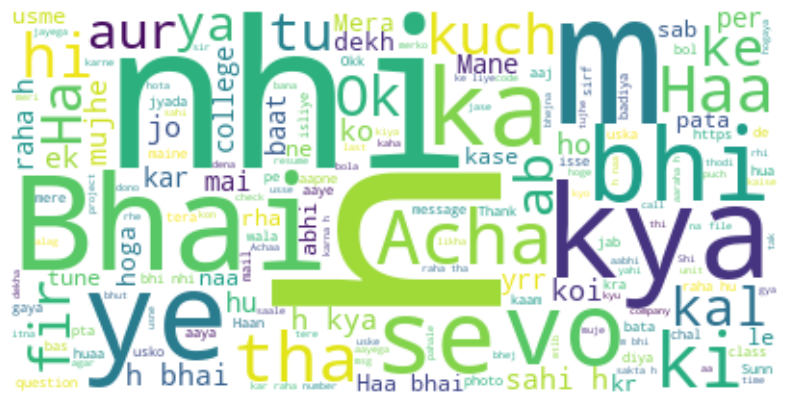

In [20]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

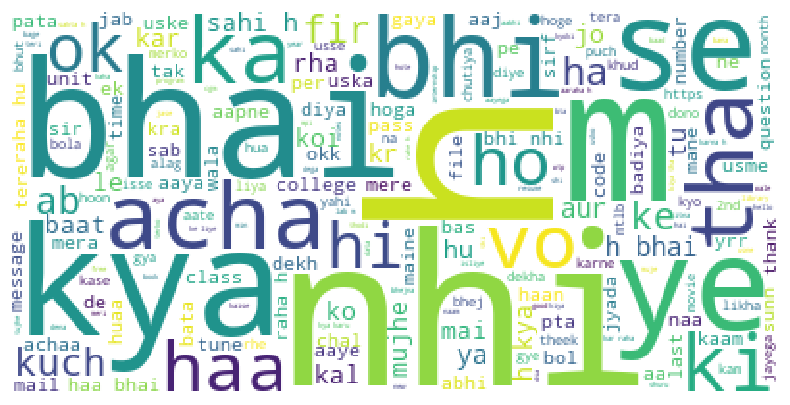

In [21]:
text = " ".join(message.lower() for message in messages_df['Message'])

# Define custom stopwords (add any additional stopwords you want to remove)
custom_stopwords = set(STOPWORDS)
# custom_stopwords.update(["bhai", "ha", "ki", "naa"])  # Add your custom stopwords here

# Remove emojis using regex
text = re.sub(r'(:[^:]*:)', '', text)

# Create a WordCloud with custom settings
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='none')
plt.axis("off")
plt.show()

Author name Kanishk Pratap Singh


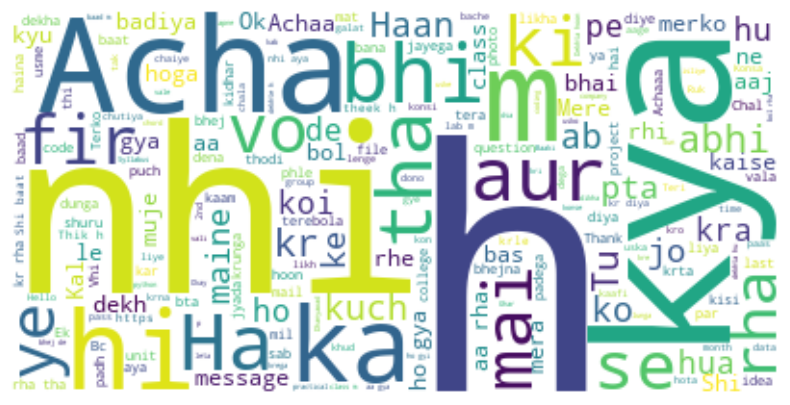

Author name @Hemant Soni


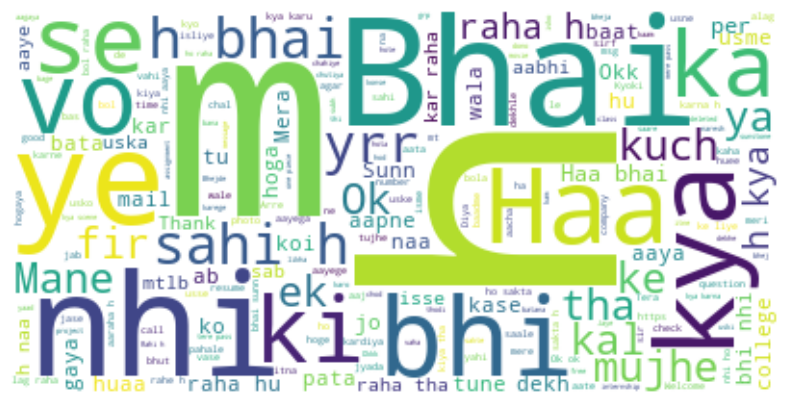

In [22]:
l = list(df.Author.unique())
for i in range(len(l)):
    if l[i]!='WhatsApp':
        dummy_df = messages_df[messages_df['Author'] == l[i]]
        text = " ".join(review for review in dummy_df.Message)
        stopwords = set(STOPWORDS)
        print('Author name',l[i])
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
        plt.figure( figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [23]:
df.head()

Date     Time                Author  \
2  03/10/21  7:16 pm  Kanishk Pratap Singh   
3  03/10/21  7:17 pm  Kanishk Pratap Singh   
4  03/10/21  7:23 pm          @Hemant Soni   
5  03/10/21  7:24 pm  Kanishk Pratap Singh   
6  03/10/21  7:24 pm  Kanishk Pratap Singh   

                                      Message emoji  urlcount  
2                                       Hello    []         0  
3                                Kanishk here    []         0  
4                                    Haa bhai    []         0  
5  Oop file mai konse assignment the shuru ke    []         0  
6                              Mai absent tha    []         0

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')
df['Month'] = df['Date'].dt.strftime('%b')
df['Date'] = df['Date'].dt.date
df

C:\Users\user\AppData\Local\Temp\ipykernel_4688\733098579.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_4688\733098579.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_4688\733098579.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Date     Time                Author  \
2     2021-10-03  7:16 pm  Kanishk Pratap Singh   
3     2021-10-03  7:17 pm  Kanishk Pratap Singh   
4     2021-10-03  7:23 pm          @Hemant Soni   
5     2021-10-03  7:24 pm  Kanishk Pratap Singh   
6     2021-10-03  7:24 pm  Kanishk Pratap Singh   
...          ...      ...                   ...   
3966  2023-08-28  1:25 pm  Kanishk Pratap Singh   
3967  2023-08-28  1:25 pm          @Hemant Soni   
3968  2023-08-28  1:25 pm  Kanishk Pratap Singh   
3969  2023-08-28  1:25 pm  Kanishk Pratap Singh   
3970  2023-08-28  1:25 pm  Kanishk Pratap Singh   

                                         Message emoji  urlcount Month_Year  \
2                                          Hello    []         0    2021-10   
3                                   Kanishk here    []         0    2021-10   
4                                       Haa bhai    []         0    2021-10   
5     Oop file mai konse assignment the shuru ke    []         0    2021-10   
6                                 Mai absent tha    []         0    2021-10   
...                                          ...   ...       ...        ...   
3966                               Tu call kr ab    []         0    2023-08   
3967         And stipend bhi nhi Diya 1 month ka    []         0    2023-08   
3968                  Chal m jata mummy bula rhi    []         0    2023-08   
3969                                Call p bolna    []         0    2023-08   
3970                                  Ki ab dedo    []         0    2023-08   

     Month  
2      Oct  
3      Oct  
4      Oct  
5      Oct  
6      Oct  
...    ...  
3966   Aug  
3967   Aug  
3968   Aug  
3969   Aug  
3970   Aug  

[3894 rows x 8 columns]

In [25]:
month_year_group = df.groupby(['Month_Year','Message'])
month_year_group.first()

Date  \
Month_Year Message                                                          
2021-10    1st year vale ayenge                                2021-10-17   
           2 bhi aayege                                        2021-10-22   
           2 class m kya krayengi ab ye                        2021-10-17   
           2nd me                                              2021-10-22   
           2nd unit kab kradi                                  2021-10-23   
...                                                                   ...   
2023-08    yrr kya musibat h                                   2023-08-03   
           yrr mujhe ye bata m usko bolu kase                  2023-08-24   
           zaroori nhi tha aaj dikhana chahte to last epis...  2023-08-06   
           😂😂😂😂                                                2023-08-19   
           🤣🤣                                                  2023-08-22   

                                                                   Time  \
Month_Year Message                                                        
2021-10    1st year vale ayenge                                10:45 am   
           2 bhi aayege                                         7:10 pm   
           2 class m kya krayengi ab ye                        10:44 am   
           2nd me                                               7:10 pm   
           2nd unit kab kradi                                   9:45 pm   
...                                                                 ...   
2023-08    yrr kya musibat h                                    4:18 pm   
           yrr mujhe ye bata m usko bolu kase                   9:00 pm   
           zaroori nhi tha aaj dikhana chahte to last epis...  11:18 am   
           😂😂😂😂                                                 1:58 pm   
           🤣🤣                                                   5:39 pm   

                                                                             Author  \
Month_Year Message                                                                    
2021-10    1st year vale ayenge                                Kanishk Pratap Singh   
           2 bhi aayege                                                @Hemant Soni   
           2 class m kya krayengi ab ye                        Kanishk Pratap Singh   
           2nd me                                              Kanishk Pratap Singh   
           2nd unit kab kradi                                  Kanishk Pratap Singh   
...                                                                             ...   
2023-08    yrr kya musibat h                                           @Hemant Soni   
           yrr mujhe ye bata m usko bolu kase                          @Hemant Soni   
           zaroori nhi tha aaj dikhana chahte to last epis...  Kanishk Pratap Singh   
           😂😂😂😂                                                Kanishk Pratap Singh   
           🤣🤣                                                  Kanishk Pratap Singh   

                                                                      emoji  \
Month_Year Message                                                            
2021-10    1st year vale ayenge                                          []   
           2 bhi aayege                                                  []   
           2 class m kya krayengi ab ye                                  []   
           2nd me                                                        []   
           2nd unit kab kradi                                            []   
...                                                                     ...   
2023-08    yrr kya musibat h                                             []   
           yrr mujhe ye bata m usko bolu kase                            []   
           zaroori nhi tha aaj dikhana chahte to last epis...            []   
           😂😂😂😂                                                [😂, 😂, 😂, 😂]   
           

In [37]:
monthly_message_counts = df.groupby(['Month_Year', 'Author']).size().unstack().fillna(0)
monthly_message_counts_long = monthly_message_counts.reset_index().melt(id_vars='Month_Year', var_name='Author', value_name='Number of Messages')
monthly_message_counts 
# # Create a bar plot using Plotly
# fig = px.bar(monthly_message_counts_long, x='Month_Year', y='Number of Messages', color='Author',
#              title='Chat Timeline By Month', labels={'Month_Year': 'Month-Year', 'Number of Messages': 'Number of Messages'},
#              hover_data={'Month_Year': False, 'Author': True, 'Number of Messages': True})

# # Customize the x-axis tick angle and labels
# fig.update_xaxes(tickangle=-45, tickmode='array', tickvals=monthly_message_counts_long['Month_Year'], ticktext=monthly_message_counts_long['Month_Year'])

# # Show the plot
# fig.show()

Author      @Hemant Soni  Kanishk Pratap Singh
Month_Year                                    
2021-10               86                   109
2021-11               65                    63
2021-12               16                    18
2022-01              119                   152
2022-02               45                    42
2022-03              118                   122
2022-04               59                    56
2022-05               77                    79
2022-06               10                    11
2022-07               40                    37
2022-08               88                    59
2022-09               54                    55
2022-10              131                   116
2022-11               46                    45
2022-12              132                   136
2023-01              143                   111
2023-02               54                    42
2023-03              131                   110
2023-04               11                    15
2023-05               81                    76
2023-06               28                    21
2023-07              202                   108
2023-08              309                   266

In [39]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')

# Extract hour from Time column
df['Hour'] = df['Time'].dt.hour

# Categorize time as AM or PM
df['AMPM'] = df['Time'].dt.strftime('%p')

# Group data by Hour, AMPM, and Author and count messages
hourly_message_counts = df.groupby(['Hour', 'AMPM', 'Author']).size().unstack().fillna(0)

# Filter out rows with no messages
hourly_message_counts = hourly_message_counts[hourly_message_counts.sum(axis=1) > 0]

hourly_message_counts_long = hourly_message_counts.reset_index().melt(id_vars=['Hour', 'AMPM'], var_name='Author', value_name='Number of Messages')

# Create a bar plot using Plotly
hourly_message_counts_long
fig = px.bar(hourly_message_counts_long, x='Hour', y='Number of Messages', color='Author',
             title='Author Activity by Time of Day', labels={'Hour': 'Time of Day (12-Hour)', 'Number of Messages': 'Number of Messages'},
             hover_data={'Hour': False, 'AMPM': False, 'Author': True, 'Number of Messages': True},
          )  # Add 'Hour' to the text parameter

# Format x-axis tick labels
hour_labels = [f"{hour % 12}{'AM' if hour < 12 else 'PM'}" for hour in range(24)]
fig.update_xaxes(tickmode='array', tickvals=list(range(24)), ticktext=hour_labels)

# Customize the x-axis tick angle and labels
fig.update_xaxes(tickangle=-45)

# Customize the layout
fig.update_layout(showlegend=True, legend=dict(orientation="v", x=1.0, y=1.05))
fig.update_traces(marker_line_width=1)

# Customize the hover template to display time, author, and number of messages
hover_template = '%{x}<br>@%{customdata[1]} : %{y}'
fig.update_traces( textfont=dict(family='Arial', size=12, color='black'), 
                  hovertemplate=hover_template)

# Show the plot
fig.show()

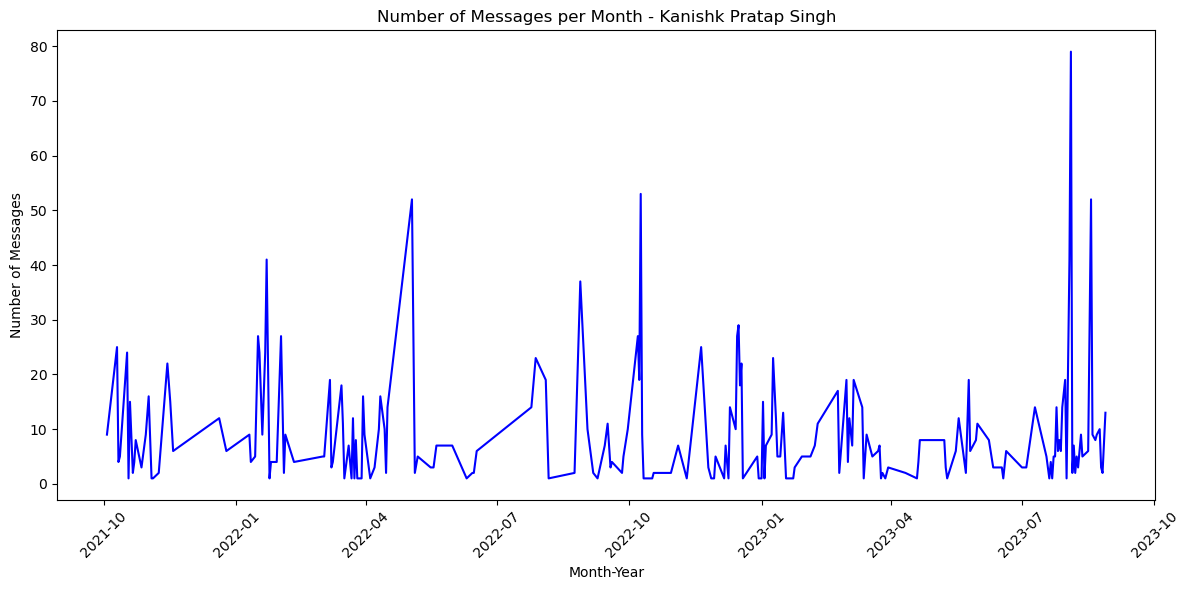

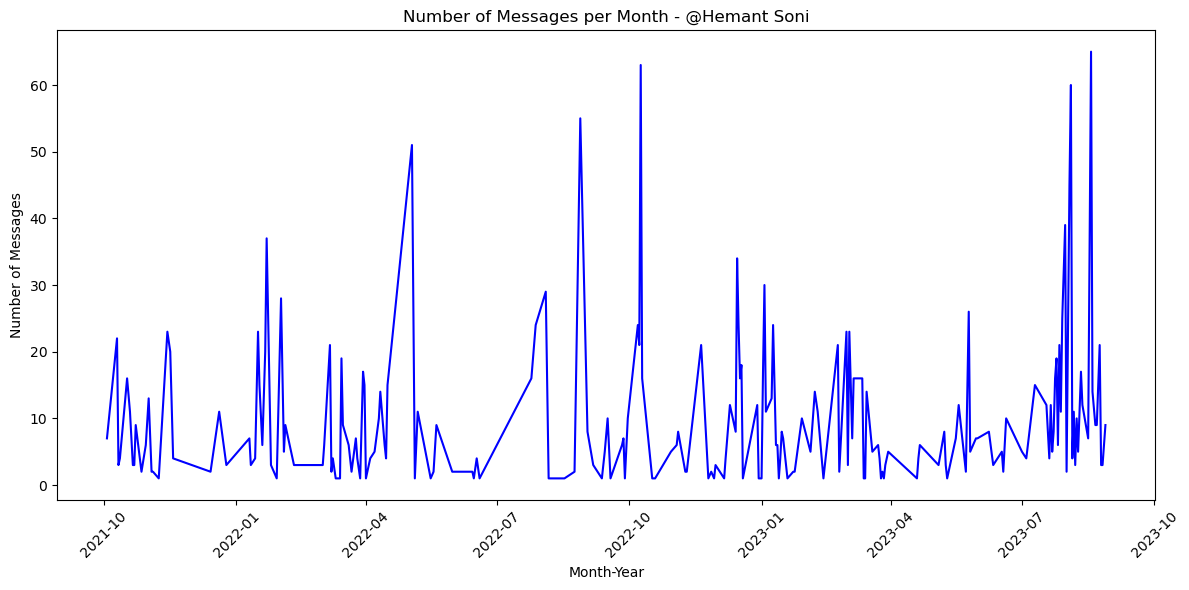

In [28]:
# Create separate bar graphs for each author
unique_authors = df['Author'].unique()
for author in unique_authors:
    if author != 'WhatsApp':
        author_subset = df[df['Author'] == author]
    
    # Group data by Month_Year and count messages
        monthly_message_counts = author_subset.groupby(['Date']).size().sort_index()
        monthly_message_counts
    # Create a new plot for each author
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=monthly_message_counts.index, y=monthly_message_counts.values, color='blue')
    
    # Customize the plot
        plt.title(f'Number of Messages per Month - {author}')
        plt.xlabel('Month-Year')
        plt.ylabel('Number of Messages')
        plt.xticks(rotation=45)
        plt.tight_layout()
    
    # Show the plot
        plt.show()

In [42]:
total_messages_per_author = df.groupby('Author')['Message'].count().reset_index()
total_messages_per_author
# Create a donut chart using Plotly
fig = px.pie(total_messages_per_author, values='Message', names='Author', hole=0.3,
             title='Total Number of Messages per Author')

# Customize hovertemplate to make the appearing message text black
fig.update_traces(hovertemplate='<b>%{label}: <b>%{value}<extra></extra>')

# Show the plot
fig.show()

In [44]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract weekday information (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Group data by weekday, Author, and count messages
weekday_message_counts = df.groupby(['Weekday', 'Author'])['Message'].count().reset_index()
print(weekday_message_counts)

# Define weekday names for the X-axis
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = px.line(weekday_message_counts, x='Weekday', y='Message', color='Author',
              labels={'Weekday': 'Weekday', 'Message': 'Number of Messages', 'Author': 'Author'},
              title='Time Series Line Chart: Number of Messages by Weekday by Authors')

# Set X-axis labels to weekday names
fig.update_xaxes(tickmode='array', tickvals=list(range(7)), ticktext=weekday_names)

# Customize the layout
fig.update_layout(title='Number of Messages by Weekday by Authors',
                  xaxis_title='Weekday',
                  yaxis_title='Number of Messages')

# Show the plot
fig.show()

    Weekday                Author  Message
0         0          @Hemant Soni      301
1         0  Kanishk Pratap Singh      280
2         1          @Hemant Soni      296
3         1  Kanishk Pratap Singh      242
4         2          @Hemant Soni      154
5         2  Kanishk Pratap Singh      176
6         3          @Hemant Soni      354
7         3  Kanishk Pratap Singh      272
8         4          @Hemant Soni      361
9         4  Kanishk Pratap Singh      354
10        5          @Hemant Soni      220
11        5  Kanishk Pratap Singh      190
12        6          @Hemant Soni      359
13        6  Kanishk Pratap Singh      335


In [31]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
correct_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set the 'Month' column as categorical with custom ordering
df['Month'] = pd.Categorical(df['Month'], categories=correct_order, ordered=True)

# Group data by month, Author, and count messages
monthly_message_counts = df.groupby(['Month', 'Author'])['Date'].count().reset_index()

fig_bubble = px.scatter(monthly_message_counts, x='Month', y='Author', size='Date', color='Author',
                        labels={'Month': 'Month', 'Date': 'Number of Messages', 'Author': 'Author'},
                        title='Bubble Chart: Number of Messages by Month and Author')

# Show the bubble chart
fig_bubble.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4688\742138684.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_4688\742138684.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df = df.sort_values(by='Date')

# Calculate the difference between consecutive dates
df['DateDiff'] = df['Date'].diff()

# Find streaks of consecutive chats (e.g., consecutive chats on consecutive days)
# Create a new streak number whenever there is a gap larger than one day
streak_count = 1
streaks = []

for diff in df['DateDiff'].dt.days:
    if diff == 1:
        streak_count += 1
    else:
        streak_count = 1
    streaks.append(streak_count)

df['Streak'] = streaks

# Calculate Chat Frequency (days per chat) for each user
user_chat_counts = df.groupby('Author')['Date'].count()
user_chat_frequency = user_chat_counts / (df['Date'].max() - df['Date'].min()).days

# Find the longest streak(s)
max_streak = df['Streak'].max()
longest_streaks = df[df['Streak'] == max_streak]

# Find the start and end dates of the longest streak(s)
longest_streak_start_dates = longest_streaks.groupby('Streak')['Date'].min()
longest_streak_end_dates = longest_streak_start_dates + pd.DateOffset(days=max_streak - 1)

print(f"Chat Frequency (Days per Chat):")
print(user_chat_frequency)
print(f"Longest Streak: {max_streak}")

for i, (start_date, end_date) in enumerate(zip(longest_streak_start_dates, longest_streak_end_dates)):
    print(f"Start Date of Longest Streak: {start_date.strftime('%Y-%m-%d')}")
    print(f"End Date of Longest Streak: {end_date.strftime('%Y-%m-%d')}")

Chat Frequency (Days per Chat):
Author
@Hemant Soni            2.946686
Kanishk Pratap Singh    2.664265
Name: Date, dtype: float64
Longest Streak: 4
Start Date of Longest Streak: 2022-10-13
End Date of Longest Streak: 2022-10-16


In [33]:
min_date = df['Date'].min()
max_date = df['Date'].max()

date_diff = max_date - min_date
total_years = date_diff.days // 365
total_months = (date_diff.days % 365) // 30
total_days = date_diff.days % 30

print(f"Total Years: {total_years}, Total Months: {total_months}, Total Days: {total_days}")

Total Years: 1, Total Months: 10, Total Days: 4


In [34]:
most_active_day = df.groupby(df['Date'].dt.date)['Author'].count().idxmax()

# Most active month
most_active_month = df.groupby(df['Date'].dt.to_period('M'))['Author'].count().idxmax()

# Most active year
most_active_year = df.groupby(df['Date'].dt.to_period('Y'))['Author'].count().idxmax()

print(f"Most Active Day: {most_active_day}")
print(f"Most Active Month: {most_active_month}")
print(f"Most Active Year: {most_active_year}")

Most Active Day: 2023-08-04
Most Active Month: 2023-08
Most Active Year: 2022


In [35]:
all_messages = " ".join(messages_df['Message'])

# Use regular expressions to find URLs
urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', all_messages)

# Remove duplicate URLs and print them
unique_urls = list(set(urls))
print(len(unique_urls))
for url in unique_urls:
    print(url)

37
https://codescracker.com/python/program/python-program-find-hcf-lcm.htm
https://www.kaggle.com/datasets/umbertogriffo/googles-trained-word2vec-model-in-python
https://innovateindia.mygov.in/agriindiahackathon/
https://forms.gle/josMj3tcqFjzUF3k6
https://youtube.com/playlist?list=PLrjkTql3jnm9cY0ijEyr2fPdwnH-0t8EY
https://vegamovies.gold/download-zom-100-bucket-list-of-the-dead-2023-english-movie-480p-720p-1080p/
https://twitter.com/DemonSlayerUSA/status/1515261803206365187?t=UTzsTzJq1GcFrP7xpFAbrg&s=08
https://youtube.com/shorts/rpcJ0mlHA8E?feature=share
https://youtu.be/l20xHDJPHBM
https://www.indiatimes.com/technology/news/bhai-lang-java-programming-script-564501.html
https://www.linkedin.com/mwlite/in/mahima-kumari-31a3991b0
https://youtu.be/Ades3pQbeh8
https://youtube.com/shorts/RUp2WlLabNc?feature=share
https://github.com/hemantsoni042
https://zoro.to/watch/attack-on-titan-the-final-season-part-3-18329?ep=99029
https://docs.google.com/document/d/1CMywScdP7s839AmVfXdXcn9HCqSWbi3

In [36]:
longest_message_index = messages_df['Message'].str.len().idxmax()

# Extract the longest message, author, and its length
longest_message = messages_df.loc[longest_message_index, 'Message']
author_of_longest_message = messages_df.loc[longest_message_index, 'Author']
length_of_longest_message = len(longest_message)

# Print the result
print(f"Author of the Longest Message: {author_of_longest_message}")
print(f"Length of the Longest Message: {length_of_longest_message} characters")
print("Longest Message:")
print(longest_message)

Author of the Longest Message: @Hemant Soni
Length of the Longest Message: 264 characters
Longest Message:
ye assignment mera hogaya to ab isko submit karne m ek problem aarahi h mujhe samaj nhi aaraha h ki sirf powerBi ka ek page m jo visualization huaa h vo share karu ya puri ek report banau jiska saare steps and approach likhe ho ki mane kase kase ye assignment kiya
